<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment10/Session10_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from traing import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = getData()



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


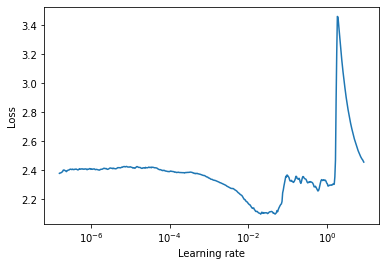

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(14,model,device, trainloader, testloader )


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.2630207538604736 Batch_id=390 Accuracy=39.13: 100%|██████████| 391/391 [00:54<00:00,  7.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.9033, Accuracy: 5333/10000 (53.33%)

EPOCH: 1


Loss=1.149710774421692 Batch_id=390 Accuracy=55.60: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.5793, Accuracy: 6015/10000 (60.15%)

EPOCH: 2


Loss=0.8184245824813843 Batch_id=390 Accuracy=66.53: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7885, Accuracy: 6774/10000 (67.74%)

EPOCH: 3


Loss=0.7159786224365234 Batch_id=390 Accuracy=73.00: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7091, Accuracy: 7463/10000 (74.63%)

EPOCH: 4


Loss=0.7209345102310181 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:54<00:00,  7.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.9707, Accuracy: 7666/10000 (76.66%)

EPOCH: 5


Loss=0.7779821157455444 Batch_id=390 Accuracy=80.62: 100%|██████████| 391/391 [00:54<00:00,  7.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.7865, Accuracy: 7894/10000 (78.94%)

EPOCH: 6


Loss=0.559281587600708 Batch_id=390 Accuracy=82.78: 100%|██████████| 391/391 [00:54<00:00,  7.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.2348, Accuracy: 8121/10000 (81.21%)

EPOCH: 7


Loss=0.46897315979003906 Batch_id=390 Accuracy=84.87: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.5520, Accuracy: 8244/10000 (82.44%)

EPOCH: 8


Loss=0.2803070545196533 Batch_id=390 Accuracy=86.19: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.6828, Accuracy: 8150/10000 (81.50%)

EPOCH: 9


Loss=0.291828453540802 Batch_id=390 Accuracy=87.82: 100%|██████████| 391/391 [00:54<00:00,  7.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9198, Accuracy: 8427/10000 (84.27%)

EPOCH: 10


Loss=0.33225107192993164 Batch_id=390 Accuracy=88.88: 100%|██████████| 391/391 [00:54<00:00,  7.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.7741, Accuracy: 8525/10000 (85.25%)

EPOCH: 11


Loss=0.3050958514213562 Batch_id=390 Accuracy=90.02: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.0944, Accuracy: 8432/10000 (84.32%)

EPOCH: 12


Loss=0.3264191746711731 Batch_id=390 Accuracy=90.35: 100%|██████████| 391/391 [00:54<00:00,  7.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.8286, Accuracy: 8517/10000 (85.17%)

EPOCH: 13


Loss=0.26869550347328186 Batch_id=390 Accuracy=91.42: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]



Test set: Average loss: -10.2477, Accuracy: 8654/10000 (86.54%)



In [6]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 93 %
Accuracy of   car : 100 %
Accuracy of  bird : 76 %
Accuracy of   cat : 67 %
Accuracy of  deer : 81 %
Accuracy of   dog : 71 %
Accuracy of  frog : 96 %
Accuracy of horse : 93 %
Accuracy of  ship : 91 %
Accuracy of truck : 89 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


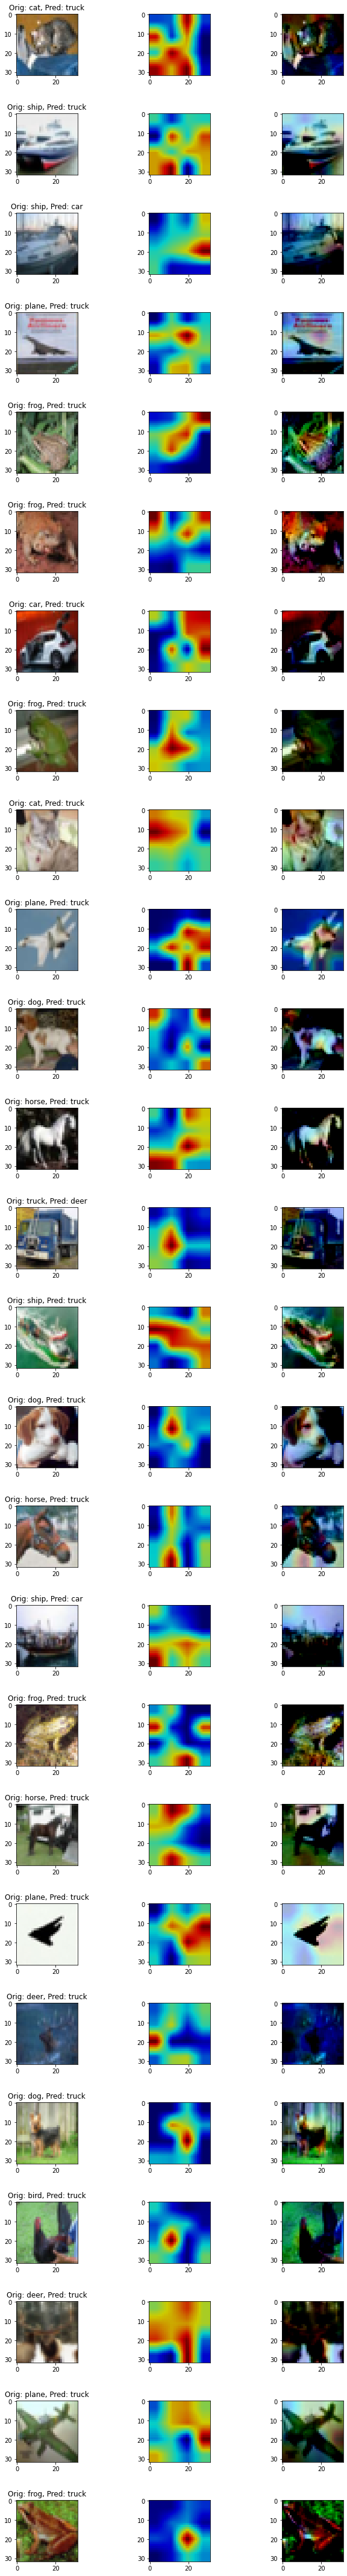

In [7]:

net =ResNet18()
MissClassifedImage(testData,net,26,classes)

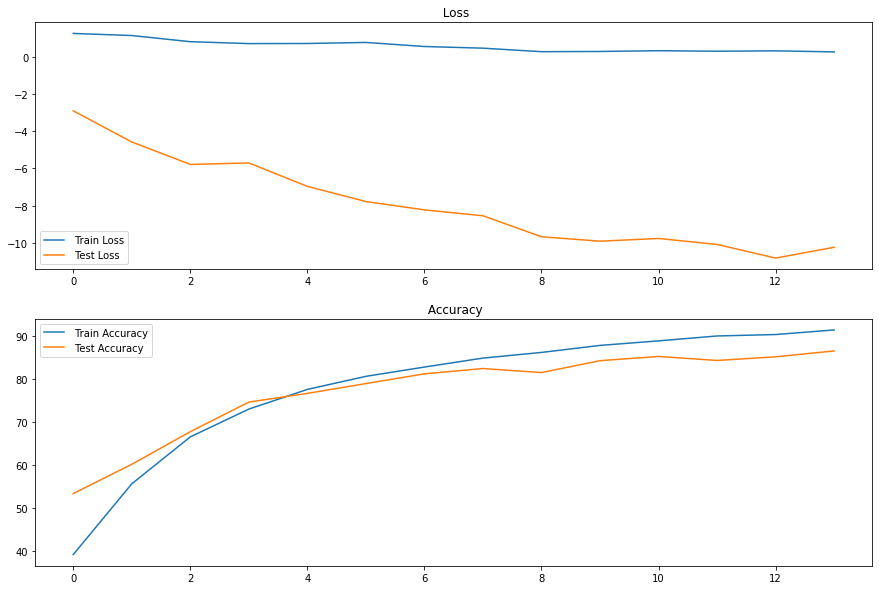

In [8]:
plotPerformanceGraph( )